## Logistic Regression(Perceptron Trick)
Here the implementation is done via the use of the perceptron trick and but it is being compared with the sklearn Logistic Regression Class which is better beacuse in the perceptron once it classifies everything it stops but the logistic regression keeps on doing better throughout the epochs

In [30]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

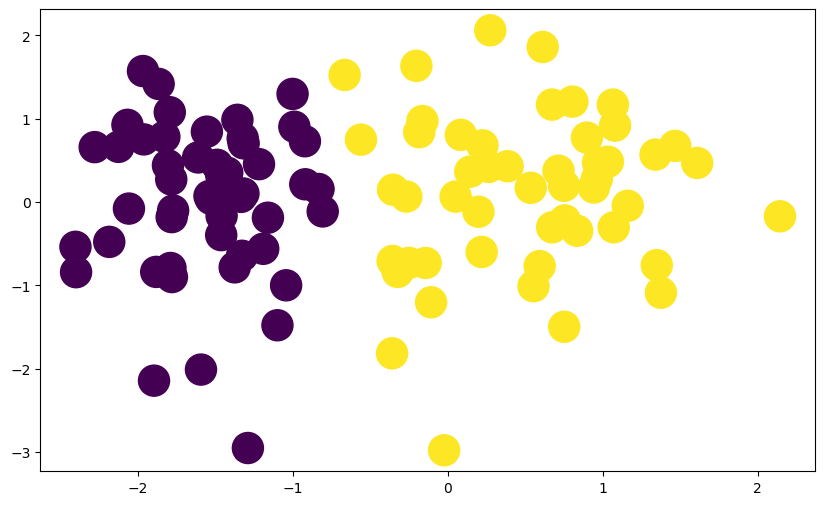

In [31]:
plt.figure(figsize = (10, 6))
plt.scatter(X[:, 0], X[:, 1], c = y, s = 500)

### Perceptron using step function

In [32]:
## implementation of perceptron usinf (1, 0) step function
def perceptron_step(X, y):
    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        
        row = np.random.randint(0, X.shape[0])
        y_pred_val = np.dot(X[row], weights)
        
        if(y_pred_val >0):
            y_pred = 1
        else:
            y_pred = 0
        
        weights = weights + lr*(y[row] - y_pred)*X[row]
    
    return weights[0], weights[1:]

In [33]:
intercept_, coeff_ = perceptron_step(X, y)

In [34]:
print(intercept_)
print(coeff_)

1.0
[1.33045384 0.06503335]


### Perceptron using Sigmoid function

In [35]:
def sigmoid(x):
    return 1/(1 + np.exp(-1*x))

In [36]:
def perceptron_sigmoid(X, y):
    
    X = np.insert(X, 0, 1, axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        
        row = np.random.randint(0, 100)
        y_pred = sigmoid(np.dot(X[row], weights))
        
        weights = weights + lr*(y[row] - y_pred)*X[row]
        
    return weights[0], weights[1:]

In [37]:
intercept_, coeff_ = perceptron_sigmoid(X, y)

In [38]:
print(intercept_)
print(coeff_)

2.6867142086604154
[ 4.4328212  -0.03288467]


In [39]:
#checking with the logistic regression
from sklearn.linear_model import LogisticRegression

In [40]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [41]:
clf.intercept_

array([2.25256402])

In [42]:
clf.coef_

array([[3.50204668, 0.02749943]])